<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [2]:
# insert code here

## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import keras
# conda install -c conda-forge keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [3]:
# insert code here
diabetes = load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

### Prepare input data

In [5]:
# Prepare input data
# input
X = diabetes.data
n_cols = X.shape[1]

# output
y = diabetes.target

# Convert the target to categorical
# y = to_categorical(
#     target,
#     num_classes = len(set(target)),
#     dtype = 'uint8')

### Split the data (training/test)

In [6]:
# insert code here
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3,
    random_state = 65)

In [7]:
y_train.shape

(309,)

### Create the model's architecture

In [8]:
# Set up the model architecture
model = Sequential()

In [9]:
# Add the first hidden layer
model.add(Dense(15, activation = 'relu', input_shape = (n_cols, )))
# Add the second hidden layer
model.add(Dense(5, activation = 'relu'))

# Add the output layer
model.add(Dense(1, activation = 'linear'))

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                165       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 80        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

In [11]:
# Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse'])

### Fit the training data

In [12]:
from sklearn.utils import shuffle
X_train2, y_train2 = shuffle(X_train, y_train, random_state=42)

In [13]:
%%time
# Fit the model
history = model.fit(
    X_train2,
    y_train2,
    validation_split = 0.25,
    batch_size = 10,
    epochs = 1000,
    verbose = 1)

Epoch 1/1000
24/24 [==============================] - 0s 10ms/step - loss: 28738.1172 - mse: 28738.1191 - val_loss: 28083.5293 - val_mse: 28083.5293
Epoch 2/1000
24/24 [==============================] - 0s 1ms/step - loss: 28702.0254 - mse: 28702.0254 - val_loss: 28041.0957 - val_mse: 28041.0957
Epoch 3/1000
24/24 [==============================] - 0s 1ms/step - loss: 28652.1230 - mse: 28652.1230 - val_loss: 27981.2344 - val_mse: 27981.2344
Epoch 4/1000
24/24 [==============================] - 0s 1ms/step - loss: 28582.9746 - mse: 28582.9746 - val_loss: 27900.0547 - val_mse: 27900.0547
Epoch 5/1000
24/24 [==============================] - 0s 1ms/step - loss: 28490.0059 - mse: 28490.0059 - val_loss: 27790.4961 - val_mse: 27790.4961
Epoch 6/1000
24/24 [==============================] - 0s 1ms/step - loss: 28363.9043 - mse: 28363.9043 - val_loss: 27643.2363 - val_mse: 27643.2363
Epoch 7/1000
24/24 [==============================] - 0s 1ms/step - loss: 28194.9941 - mse: 28194.9941 - val_lo

### Create predictions

In [17]:
# insert code here
predictions = model.predict_classes(X_test)

In [18]:
cm = confusion_matrix(y_test, predictions)
print_cm(cm)

NameError: name 'print_cm' is not defined

### Evaluate the model

In [ ]:
# insert code here

### Visualisation of cost

In [20]:
history.history

{'loss': [28738.1171875,
  28702.025390625,
  28652.123046875,
  28582.974609375,
  28490.005859375,
  28363.904296875,
  28194.994140625,
  27979.537109375,
  27710.638671875,
  27393.412109375,
  27006.2578125,
  26568.49609375,
  26061.89453125,
  25486.37109375,
  24847.482421875,
  24148.072265625,
  23373.548828125,
  22556.263671875,
  21689.12890625,
  20778.478515625,
  19820.92578125,
  18818.875,
  17820.615234375,
  16775.53125,
  15765.4375,
  14737.697265625,
  13721.6669921875,
  12714.01953125,
  11705.220703125,
  10779.8955078125,
  9873.818359375,
  9058.068359375,
  8359.29296875,
  7704.3134765625,
  7093.275390625,
  6596.99072265625,
  6162.2099609375,
  5771.69677734375,
  5448.3916015625,
  5181.2783203125,
  4992.537109375,
  4828.88134765625,
  4699.88720703125,
  4614.28857421875,
  4519.72998046875,
  4453.94287109375,
  4392.580078125,
  4342.32177734375,
  4299.80224609375,
  4272.572265625,
  4240.76025390625,
  4205.5068359375,
  4181.92529296875,
  415

In [ ]:
# insert code here

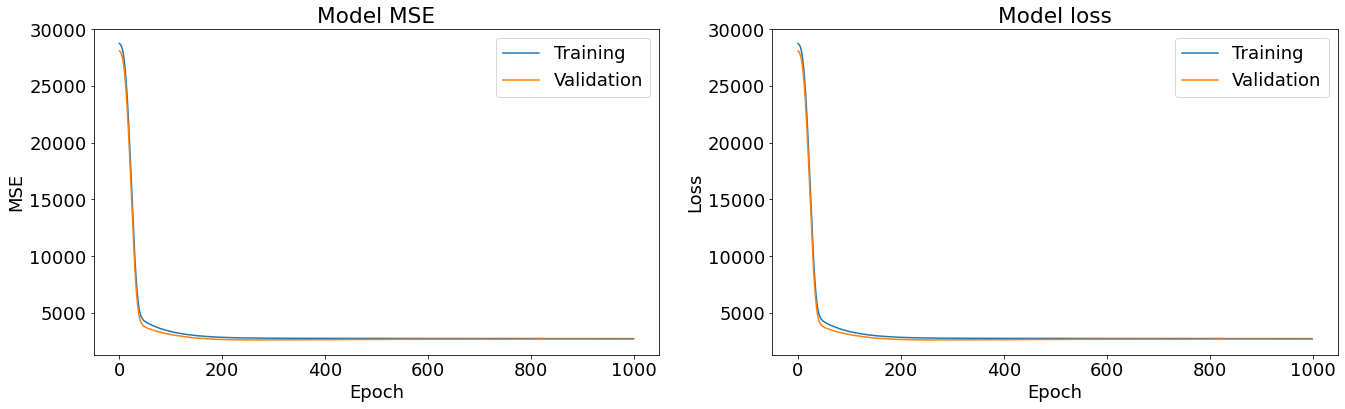

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [ ]:
# insert code here

© 2020 Institute of Data